Angelina Shibu \
2001CS06

In [1]:
def load_dataset(file_path):
    with open(file_path, 'r') as file:
        data = file.read().split('\n')
    return data


In [2]:
lines = load_dataset('Brown_train.txt')
print(lines[40])

They/PRON estimate/VERB further/ADV that/ADP with/ADP sufficient/ADJ experience/NOUN and/CONJ when/ADV cost-data/NOUN of/ADP compact/ADJ cars/NOUN is/VERB compiled/VERB ,/. the/DET break-even/ADJ point/NOUN may/VERB be/VERB reduced/VERB to/ADP 7,500/NUM miles/NOUN of/ADP travel/NOUN per/ADP year/NOUN ./. 


In [3]:
tags = set()
data = []

for line in lines:
    words_tags = line.split(' ')
    words = []
    tokenized_words = []

    for word_tag in words_tags:
        if word_tag == '':
            continue
        words = word_tag.split('/')
        tag = words[-1]
        word = '/'.join(words[:-1])
        tags.add(tag)
        tokenized_words.append((word, tag))

    data.append(tokenized_words)

In [4]:
tags = list(tags)
print(len(tags),tags)

12 ['ADP', '.', 'NUM', 'ADJ', 'CONJ', 'DET', 'X', 'ADV', 'VERB', 'PRT', 'PRON', 'NOUN']


In [5]:
display(data[40])

[('They', 'PRON'),
 ('estimate', 'VERB'),
 ('further', 'ADV'),
 ('that', 'ADP'),
 ('with', 'ADP'),
 ('sufficient', 'ADJ'),
 ('experience', 'NOUN'),
 ('and', 'CONJ'),
 ('when', 'ADV'),
 ('cost-data', 'NOUN'),
 ('of', 'ADP'),
 ('compact', 'ADJ'),
 ('cars', 'NOUN'),
 ('is', 'VERB'),
 ('compiled', 'VERB'),
 (',', '.'),
 ('the', 'DET'),
 ('break-even', 'ADJ'),
 ('point', 'NOUN'),
 ('may', 'VERB'),
 ('be', 'VERB'),
 ('reduced', 'VERB'),
 ('to', 'ADP'),
 ('7,500', 'NUM'),
 ('miles', 'NOUN'),
 ('of', 'ADP'),
 ('travel', 'NOUN'),
 ('per', 'ADP'),
 ('year', 'NOUN'),
 ('.', '.')]

In [6]:
from models import BigramHMM, TrigramHMM

In [7]:
import numpy as np
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

def k_fold_cross_validation(data, k, Model):
    kf = KFold(n_splits=k, shuffle=True)

    combined_actual_tags = []
    combined_predicted_tags = []

    for i, (train_index, test_index) in enumerate(kf.split(data)):
        train_data = [data[i] for i in train_index]
        test_data = [data[i] for i in test_index]

        model = Model(train_data, tags)
        model.train()
        
        predicted_tags = []
        actual_tags = []

        for sentence in test_data:
            words = [word for word, _ in sentence]
            tagged_words = model.viterbi(words)
            predicted_tags.extend([tag for _, tag in tagged_words])
            actual_tags.extend([tag for _, tag in sentence])

        predicted_tags = np.array(predicted_tags).flatten()
        actual_tags = np.array(actual_tags).flatten()

        print(f"Fold {i+1} results:")
        print(classification_report(actual_tags, predicted_tags))
        combined_actual_tags.extend(actual_tags)
        combined_predicted_tags.extend(predicted_tags)

    return combined_actual_tags, combined_predicted_tags

In [8]:
actual_tags, predicted_tags = k_fold_cross_validation(data, 5, BigramHMM)


Fold 1 results:
              precision    recall  f1-score   support

           .       1.00      1.00      1.00     14330
         ADJ       0.92      0.85      0.89      7284
         ADP       0.73      0.93      0.81     13295
         ADV       0.91      0.85      0.88      5543
        CONJ       1.00      0.99      0.99      3475
         DET       0.98      0.99      0.98     12693
        NOUN       0.97      0.89      0.93     24184
         NUM       0.98      0.91      0.94      1378
        PRON       0.99      0.94      0.97      5338
         PRT       0.74      0.81      0.77      3161
        VERB       0.98      0.93      0.96     17794
           X       0.84      0.32      0.46       117

    accuracy                           0.93    108592
   macro avg       0.92      0.87      0.88    108592
weighted avg       0.93      0.93      0.93    108592

Fold 2 results:
              precision    recall  f1-score   support

           .       1.00      1.00      1.00   

Overall results for bigram model:
              precision    recall  f1-score   support

           .       1.00      1.00      1.00     71555
         ADJ       0.92      0.85      0.88     36466
         ADP       0.72      0.93      0.81     65861
         ADV       0.92      0.85      0.88     27683
        CONJ       0.99      0.99      0.99     17779
         DET       0.98      0.99      0.98     63164
        NOUN       0.97      0.89      0.93    120770
         NUM       0.96      0.91      0.93      6664
        PRON       0.99      0.94      0.97     27229
         PRT       0.73      0.81      0.77     15622
        VERB       0.98      0.93      0.96     89766
           X       0.84      0.27      0.41       590

    accuracy                           0.93    543149
   macro avg       0.92      0.86      0.88    543149
weighted avg       0.94      0.93      0.93    543149

Confusion Matrix:


<Axes: >

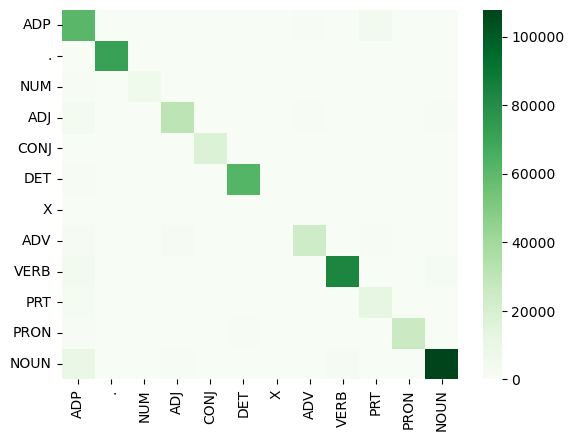

In [9]:
print("Overall results for bigram model:")
print(classification_report(actual_tags, predicted_tags))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(actual_tags, predicted_tags, labels=tags), cmap='Greens', xticklabels=tags, yticklabels=tags)

In [10]:
actual_tags, predicted_tags = k_fold_cross_validation(data, 5, TrigramHMM)

Fold 1 results:
              precision    recall  f1-score   support

           .       1.00      0.95      0.97     14187
         ADJ       0.91      0.84      0.87      7137
         ADP       0.56      0.93      0.70     13004
         ADV       0.92      0.77      0.84      5674
        CONJ       0.99      0.92      0.95      3583
         DET       0.98      0.90      0.94     12500
        NOUN       0.97      0.87      0.92     23794
         NUM       0.96      0.84      0.89      1304
        PRON       0.99      0.75      0.85      5615
         PRT       0.75      0.70      0.72      3229
        VERB       0.98      0.92      0.95     18106
           X       0.21      0.20      0.21       104

    accuracy                           0.88    108237
   macro avg       0.85      0.80      0.82    108237
weighted avg       0.91      0.88      0.89    108237

Fold 2 results:
              precision    recall  f1-score   support

           .       1.00      0.95      0.97   

Overall results for trigram model:
              precision    recall  f1-score   support

           .       1.00      0.95      0.97     71555
         ADJ       0.91      0.85      0.88     36466
         ADP       0.56      0.93      0.70     65861
         ADV       0.92      0.76      0.83     27683
        CONJ       0.99      0.93      0.96     17779
         DET       0.98      0.90      0.94     63164
        NOUN       0.97      0.87      0.92    120770
         NUM       0.96      0.83      0.89      6664
        PRON       0.99      0.75      0.85     27229
         PRT       0.73      0.70      0.71     15622
        VERB       0.98      0.92      0.95     89766
           X       0.31      0.21      0.25       590

    accuracy                           0.88    543149
   macro avg       0.86      0.80      0.82    543149
weighted avg       0.91      0.88      0.89    543149

Confusion Matrix:


<Axes: >

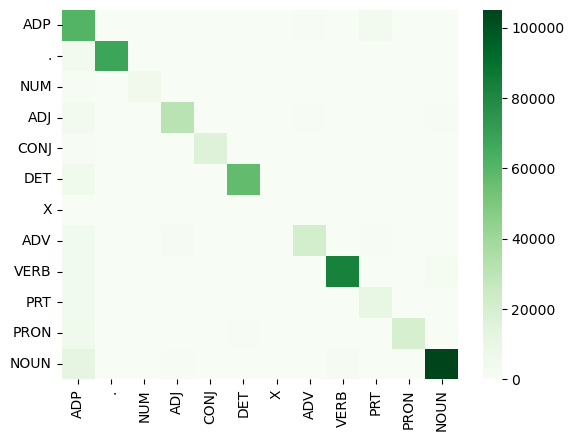

In [11]:
print("Overall results for trigram model:")
print(classification_report(actual_tags, predicted_tags))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(actual_tags, predicted_tags, labels=tags), cmap='Greens', xticklabels=tags, yticklabels=tags)